# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

Project task is to find out after fixing the data, what factors have the greatest impact on the price of a car.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [2]:
# Load the data file into a DataFrame
car_data=pd.read_csv('/datasets/vehicles_us.csv')
print(car_data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# print the general/summary information about the DataFrame
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
car_data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


The issues are: 

- 1.There are missing values in 5 columns: model_year, cylinders, odometer, paint_color, is_4wd. 

- 2.The data type for date_posted should be changed to datetime.

The data type for date_posted should be changed to datetime. model_year should be changed to int64

In [5]:
car_data['date_posted']=pd.to_datetime(car_data['date_posted'])
car_data['model_year']=pd.to_datetime(car_data['model_year'], errors='coerce').astype('int64')
car_data.info()
car_data.isnull().sum()/len(car_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


price           0.000000
model_year      0.000000
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

[Are there missing values across all columns or just a few? What columns contain the most missing values? Briefly describe what you see in 1-2 sentences.]is_4wd contains the most missing values. paint_color is the second and odometer is the third.

### Conclusions and further steps

 MIssing values need to be dealt with.

 Missing values in all columns should be treated in the most efficiant matter to finally check if the column has effect on price. car_age column need to be created to check average mileage per year.

## Treat missing values (if any)

In [6]:

#lets see how many unique car models there are(100)
print(len(car_data['model'].unique()))
print()

#checking if pre entered values are correct, in order to see if nan values can be replaced.
#I choose a model which is not a 4wd car, and check if there are mistakes in the column.
print(car_data[(car_data['model']=='hyundai sonata') & (car_data['is_4wd']==1.0)].head(10))
print()

#hyundai sonata is not a 4wd and there is several mistakes where the model is classified as 
#4wd, as the user have entered the data, it can't be trusted, but we can fill
# the nan values on is_4wd based on model and all the rest can be filled with 0.
car_data['is_4wd'] = car_data.groupby('model')['is_4wd'] \
                 .transform(lambda x: x.fillna(x.max())).fillna(0).astype(int)
print(car_data[['model', 'is_4wd']].head(10))
print()

100

       price  model_year           model  condition  cylinders fuel  odometer  \
229     6995        2011  hyundai sonata  excellent        4.0  gas  117371.0   
11011   1900        2008  hyundai sonata       good        4.0  gas       NaN   
14092    199        2013  hyundai sonata  excellent        NaN  gas   88590.0   
14093    199        2013  hyundai sonata  excellent        NaN  gas   88590.0   
15208   4790        2011  hyundai sonata   like new        4.0  gas  130000.0   

      transmission   type paint_color  is_4wd date_posted  days_listed  
229      automatic  sedan        grey     1.0  2019-02-26           20  
11011    automatic  sedan      custom     1.0  2019-04-11           15  
14092    automatic  sedan        grey     1.0  2019-04-15           45  
14093    automatic  sedan        grey     1.0  2019-02-21           25  
15208    automatic  sedan        grey     1.0  2019-01-03            3  

            model  is_4wd
0          bmw x5       1
1      ford f-150

In [7]:
#filling missing values in paint_color. 
#checking paint_color value count
print('paint_color value count:',car_data['paint_color'].value_counts())
print()

#There is no way to accrutly predict the missing color. I will fill nan values with white
#as the user may have ommited color because it is white.
car_data['paint_color']=car_data['paint_color'].fillna('unknown')



paint_color value count: white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64



In [8]:
#filling nan values in the odometer column. The model_year and odometer values will need to 
#be taken into account. Removing wrong values in model_year.
print('model_year value count:', car_data.model_year.value_counts())
print()

# we have 3619 values with -9223372036854775808.
print(car_data[car_data.model_year==-9223372036854775808]['odometer'])
print()

#we can replace these values with model_year median for each car model that have the wrong
#-9223372036854775808 value
#creating a car list with the car models that have -9223372036854775808
car_list=car_data[car_data['model_year']==-9223372036854775808]['model'].unique()

#for loop to change each -9223372036854775808 value with the model year median
for car in car_list:
    model_year_median=car_data[car_data['model']==car]['model_year'].median()
    car_data.loc[(car_data.model==car) & (car_data.model_year==-9223372036854775808), 'model_year']=model_year_median

#creating car_age column
car_data['car_age']=pd.DatetimeIndex(car_data['date_posted']).year - car_data['model_year']

#filling in odometer nan values. first we should calculate the average mileage for each year
#then we can fill the nan values
year_mileage_m=car_data[['odometer', 'car_age']].median()
year_mileage_m=year_mileage_m['odometer']/year_mileage_m['car_age']
print('The average mileage per year is:', year_mileage_m)
print()

#replacing the nan values with age*median mileage
car_data['odometer'] = car_data.groupby('car_age')['odometer'] \
                 .transform(lambda x: x.fillna(year_mileage_m*car_data['car_age']))

model_year value count: -9223372036854775808    3619
 2013                   3549
 2012                   3468
 2014                   3448
 2011                   3375
                        ... 
 1954                      1
 1955                      1
 1961                      1
 1936                      1
 1949                      1
Name: model_year, Length: 69, dtype: int64

1         88705.0
20       147485.0
65       108500.0
69        97510.0
72        74000.0
           ...   
51464    135778.0
51465     86456.0
51487     15804.0
51488    203000.0
51508    150000.0
Name: odometer, Length: 3619, dtype: float64

The average mileage per year is: 14125.0



In [9]:
#filling in the cylinders nan values we need to trust the most of the users entered the
#correct value, therefor we will use the median to fill in the nan.
#first we see if there are outliers
print(car_data.cylinders.describe())
print()

#data looks ok, with not obvious outliers. But 12 cylinders seems to be too much.
#I will calculate the median cylinders for each car model and assign it to nan and
#all other cells, as we can't trust user accuracy, but as we have a big data table
#we can take the median which will not include the mistakes/outliers.
#creating a car list for all the cars (we know the max cylinders per the describe above)
car_list=car_data[car_data['cylinders'] <= 12]['model'].unique()

#iterating over the list for find the median cylinders for each car model, and assigning 
#the median to the car 'cylinders' column
for car in car_list:
    cylinders_median=car_data[car_data['model']==car]['cylinders'].median()
    car_data.loc[car_data.model==car, 'cylinders']=cylinders_median

#let's check we filled in all the nan values
car_data.info()
#all nan values were filled

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
car_age         51525 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 5.5+ MB


## Fix data types

In [10]:
car_data['model_year']=pd.to_numeric(car_data['model_year']).astype('int64')
car_data['car_age']=pd.to_numeric(car_data['car_age']).astype('int64')
car_data['cylinders']=pd.to_numeric(car_data['cylinders']).astype('int64')
car_data['odometer']=pd.to_numeric(car_data['odometer']).astype('int64')
car_data['is_4wd']=car_data['is_4wd'].astype('bool')

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
car_age         51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(6), object(6)
memory usage: 5.2+ MB


## Enrich data

In [11]:
# Add datetime values for when the ad was placed
#already done
car_data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [12]:
# Add the vehicle's age when the ad was placed
#already done
car_data.car_age
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
car_age         51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(6), object(6)
memory usage: 5.2+ MB


In [13]:
# Add the vehicle's average mileage per year
for row in car_data:
    car_data['average_mileage']=car_data['odometer']/car_data['car_age']
car_data['average_mileage'].replace(np.inf, 0, inplace=True)    
car_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,20714.285714
1,25500,2010,ford f-150,good,8,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,226000,automatic,pickup,unknown,True,2019-03-22,9,16,14125.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,True,2018-10-03,37,5,17627.200000
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,True,2018-11-14,22,16,11343.750000
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,True,2018-11-15,32,9,14222.222222
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,True,2018-07-02,71,5,27914.600000


## Check clean data

In [15]:
# print the general/summary information about the DataFrame
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
price              51525 non-null int64
model_year         51525 non-null int64
model              51525 non-null object
condition          51525 non-null object
cylinders          51525 non-null int64
fuel               51525 non-null object
odometer           51525 non-null int64
transmission       51525 non-null object
type               51525 non-null object
paint_color        51525 non-null object
is_4wd             51525 non-null bool
date_posted        51525 non-null datetime64[ns]
days_listed        51525 non-null int64
car_age            51525 non-null int64
average_mileage    51204 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 5.6+ MB


In [16]:
# print a sample of data
car_data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,20714.285714
1,25500,2010,ford f-150,good,8,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,226000,automatic,pickup,unknown,True,2019-03-22,9,16,14125.000000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,True,2018-12-27,73,3,26404.000000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,18245.500000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,6,17362.333333
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,11,13381.000000


## Study core parameters



The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


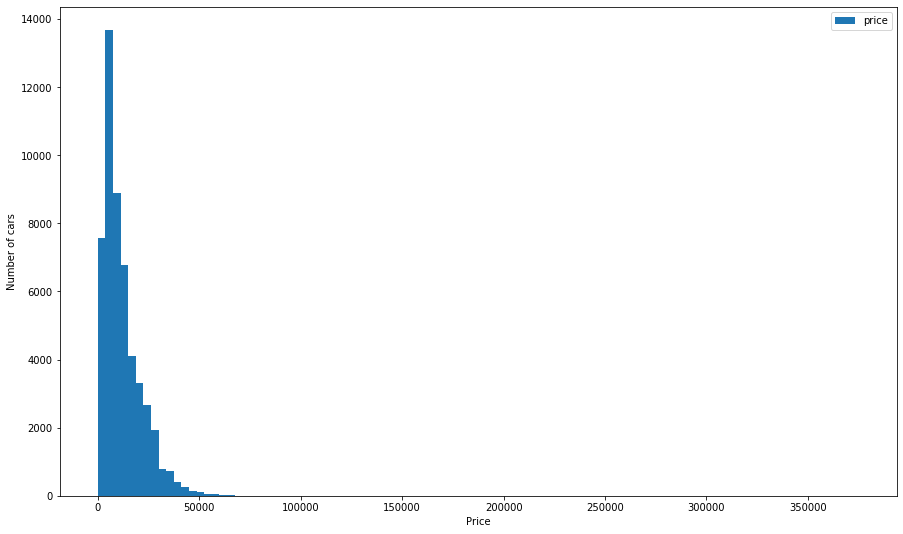

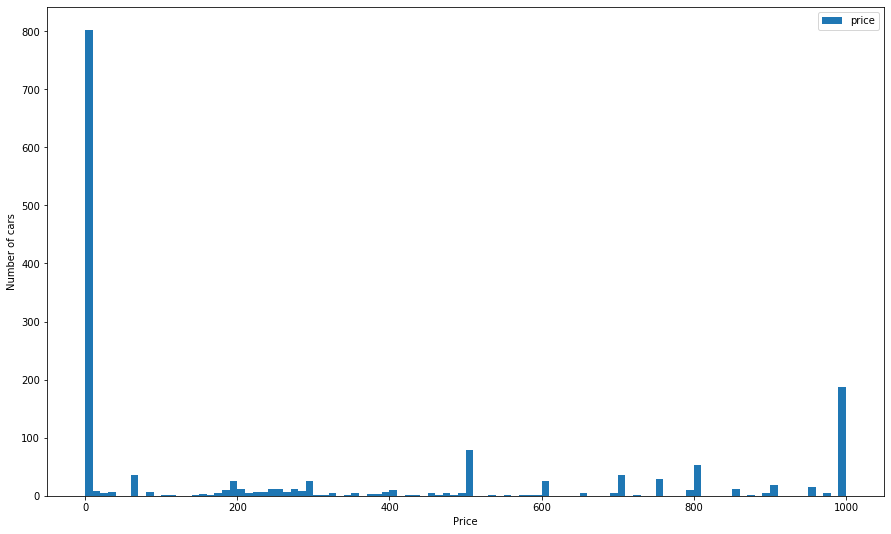

model
cadillac escalade             13995.0
chevrolet camaro              11961.0
chevrolet corvette            16000.0
chevrolet silverado 1500      13995.0
chevrolet silverado 2500hd    16995.0
chevrolet silverado 3500hd    21990.0
chevrolet suburban             9995.0
chevrolet tahoe                9800.0
ford f-150                    12294.0
ford f-250                    10700.0
ford f-250 super duty         13750.0
ford f250 super duty          11999.0
ford f350                     15995.0
ford f350 super duty          12947.5
gmc sierra 2500hd             19989.5
honda civic                    4995.0
honda odyssey                  5500.0
jeep cherokee                 12677.0
nissan frontier               10995.0
ram 2500                      20990.0
ram 3500                      22985.0
subaru impreza                 6947.5
toyota sienna                  6495.0
toyota tundra                 13500.0
Name: price, dtype: float64
69


0.015487627365356624
       price  model_year    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


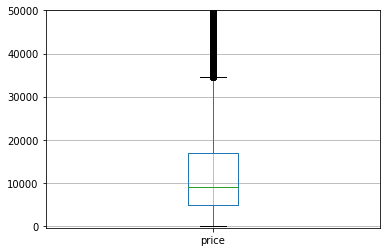

In [17]:
#let's create a duplicate data frame were we create a new clean one
clean_data=car_data.copy()

#first showing the histogram of price
print(car_data['price'].describe())

#there are potential outliers, as the std is very high, also where the price is 1 and 
#prices above 100,000 need to be checked
car_data['price'].plot(kind='hist',bins=100, figsize=(15, 9), legend=True)
plt.xlabel('Price') 
plt.ylabel('Number of cars') 
plt.show()
print()

#zooming in on prices between 1 to 1000
car_data['price'].plot(kind='hist', bins=100, figsize=(15, 9), range=(0, 1000), legend=True)
plt.xlabel('Price') 
plt.ylabel('Number of cars') 
plt.show()

#we can see that there are 800 cars priced at 1 dollars which seems like an outlier.
#let's see the boxplot
plt.ylim(-400, 50000)
car_data.boxplot('price')

#we can see from the box plot that outliers is a feature of the data due to most points being
#outside of the whiskers.
#let's see the price of large outliers. I'll check prices over 60,000 and check against the 
#model price median, and if there is a big difference it can be dropped
cars_above=car_data[(car_data['price'] > 60000)]['model']
prices_cars_above=car_data.query('model in @cars_above')
print(prices_cars_above.groupby('model')['price'].median())

#as can be seen all models price medians are way below 60,000 therefor we can treat them
#as mistakes and drop them as there aren't many.(69 values)
print(len(car_data[(car_data['price'] > 60000)]))
clean_data.drop(clean_data[(clean_data['price'] > 60000)].index, inplace=True)
print()
print()

#next we should treat the very low priced cars. Let's fix prices of cars below valued at 1.
print(len(car_data[(car_data['price'] == 1)])/ len(car_data))
#as the 1 price valued cars are only 1.5% of the data it can be removed
clean_data.drop(clean_data[(clean_data['price'] == 1)].index, inplace=True)


#next we should treat the very other low priced cars. Let's check prices of cars below 1,000
#against their median price to filter mistakes and outliers
print(car_data[(car_data['price'] < 1000)])
df_pivot=car_data.pivot_table(index=['model', 'model_year'], values='price', aggfunc='median')


#lets check for the lowest median
print(df_pivot.reindex(df_pivot['price'].sort_values(ascending=False).index))

#the lowest median is gmc yukon	2018	399.0 therefor lets drop values under this price
clean_data.drop(clean_data[(car_data['price'] <399)].index, inplace=True)




7     3933
6     3871
5     3760
4     3419
8     3317
      ... 
89       1
65       1
58       1
59       1
63       1
Name: car_age, Length: 68, dtype: int64
       price  model_year               model  condition  cylinders fuel  \
10018  23900        1955           ford f250  excellent          8  gas   
14752  15000        1954          ford f-150  excellent          8  gas   
22595  21000        1948    chevrolet impala   like new          6  gas   
33906  12995        1908           gmc yukon       good          8  gas   
33907  12995        1908   cadillac escalade  excellent          8  gas   
34713   5000        1936          ford f-150  excellent          8  gas   
36582  44900        1949  chevrolet suburban       good          8  gas   
45694  18000        1929          ford f-150       good          8  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
10018     47180       manual   truck        blue    True  2018-12-22   
14752      3565    

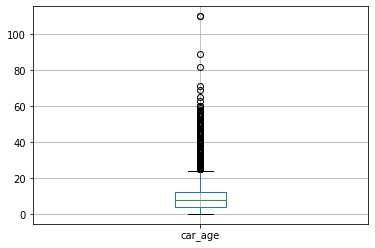

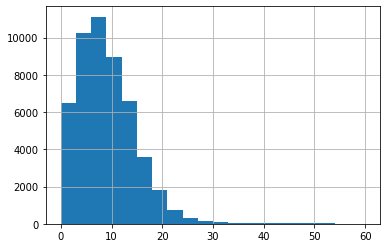

In [18]:
#The vehicle's age columns when the ad was placed
print(clean_data['car_age'].value_counts())
print(clean_data[clean_data['car_age'] >60])
clean_data.boxplot('car_age')
plt.show()
#The vehicle's age columns that are more then 60 years ols can be dropped.
clean_data.drop(clean_data[(clean_data['car_age'] > 60)].index, inplace=True)
clean_data['car_age'].hist(bins=20)
plt.show()
#car_age column now looks better.



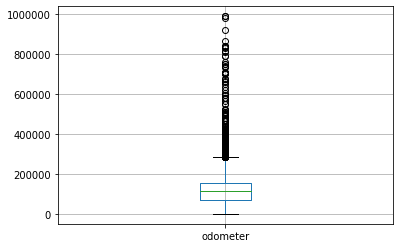

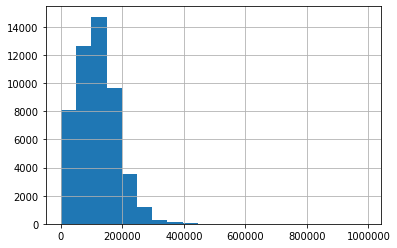

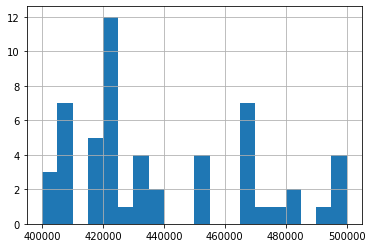

In [19]:
#Mileage
clean_data.boxplot('odometer')
plt.show()
clean_data['odometer'].hist(bins=20)
plt.show()
clean_data['odometer'].hist(bins=20, range=(400000, 500000))
plt.show()
#values above 400000 are scarce and are ouliers, or mistakes by user, is can be dropped as
#they also don't seems reasonable
clean_data.drop(clean_data[(clean_data['odometer'] > 400000)].index, inplace=True)



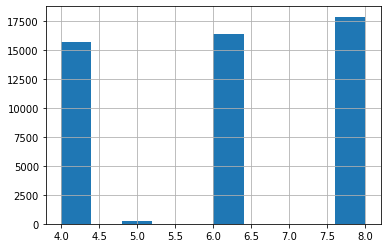

8    17897
6    16382
4    15752
5      280
Name: cylinders, dtype: int64

In [20]:
#Number of cylinders
clean_data['cylinders'].hist(bins=10)
plt.show()
clean_data['cylinders'].value_counts()
#value swere already fixed and look good

In [21]:
#Condition
clean_data['condition'].value_counts()
#seems ok, nothing to fix




excellent    23804
good         20038
like new      4651
fair          1578
new            126
salvage        114
Name: condition, dtype: int64

## Study core parameters without outliers

By comparing clean_data and car_data we can see that clean_data values are more distributed follow normal distribution of values. Whereas car_data has extream values that skewed out the median.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50311 entries, 0 to 51524
Data columns (total 15 columns):
price              50311 non-null int64
model_year         50311 non-null int64
model              50311 non-null object
condition          50311 non-null object
cylinders          50311 non-null int64
fuel               50311 non-null object
odometer           50311 non-null int64
transmission       50311 non-null object
type               50311 non-null object
paint_color        50311 non-null object
is_4wd             50311 non-null bool
date_posted        50311 non-null datetime64[ns]
days_listed        50311 non-null int64
car_age            50311 non-null int64
average_mileage    50039 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(6)
memory usage: 5.8+ MB


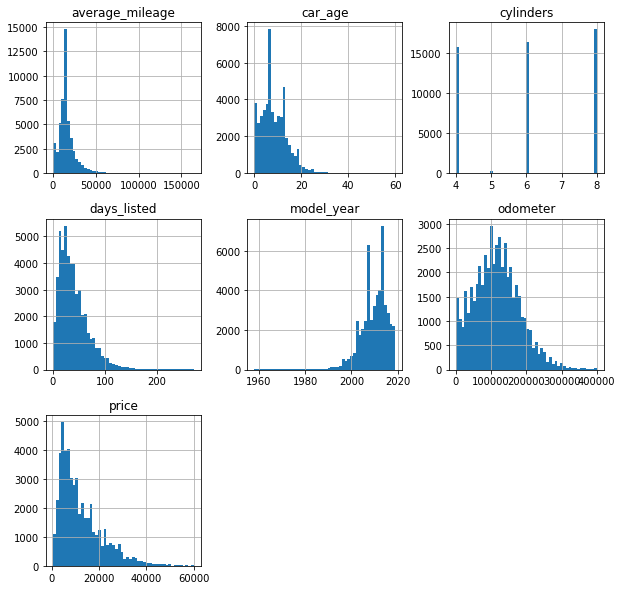

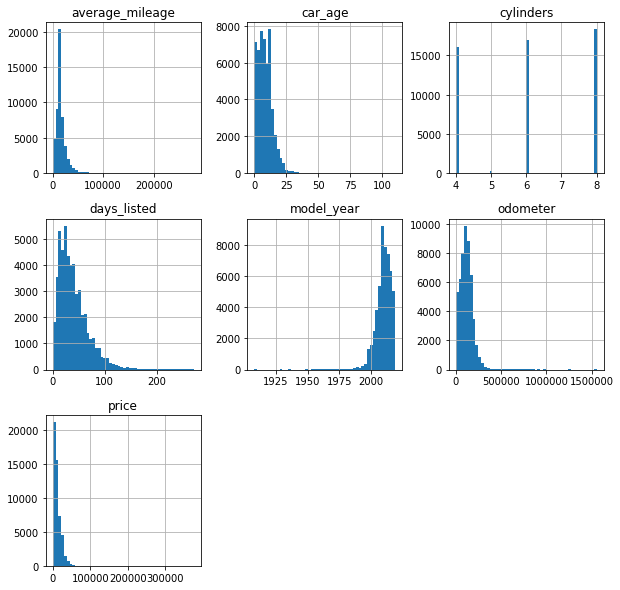

In [22]:
clean_data.info()
clean_data.hist(column=['price','model_year','cylinders','odometer','days_listed','car_age','average_mileage'], bins=50, figsize=(10, 10))
plt.show()
car_data.hist(column=['price','model_year','cylinders','odometer','days_listed','car_age','average_mileage'], bins=50, figsize=(10, 10))
plt.show()

## Ads lifetime

Per pivot table we can see that the median was always lower from mean when grouping by car model. This means there are more abnormally long duration ads then short duration. Per scatter plot we can see that the tail is rightly skewed towrads larger day values, whereas the majoraty of ads are below 125 days. We can see that cheaper priced cars having the lowest days of ads displyed. The typical ad will be displayed for a month on average not including the really long displayed ads.

                                        mean  median
model                                               
acura tl                           40.122881    33.5
bmw x5                             42.419476    34.0
buick enclave                      39.206642    33.0
cadillac escalade                  42.028481    34.5
chevrolet camaro                   38.114846    32.0
chevrolet camaro lt coupe 2d       39.697749    35.0
chevrolet colorado                 38.285714    33.5
chevrolet corvette                 38.668790    33.0
chevrolet cruze                    42.058036    34.0
chevrolet equinox                  38.692440    33.0
chevrolet impala                   39.401216    33.0
chevrolet malibu                   39.411667    33.5
chevrolet silverado                41.086991    35.0
chevrolet silverado 1500           39.201771    33.0
chevrolet silverado 1500 crew      39.056106    33.0
chevrolet silverado 2500hd         37.871823    32.0
chevrolet silverado 3500hd         38.708333  

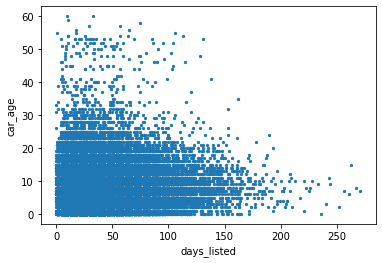

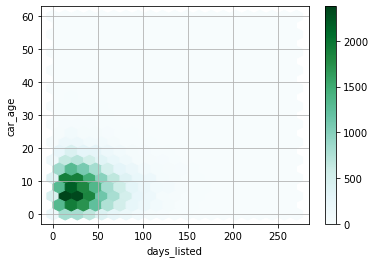

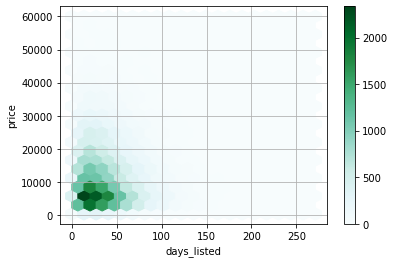

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(clean_data.pivot_table(index=['model'], values='days_listed', aggfunc=('mean', 'median')))

#car_data.groupby('model')['days_listed'].median().mean()
print(clean_data.plot.scatter(x = 'days_listed', y = 'car_age', s = 5))

#let's see correlation is the data
print(clean_data.corr())

#checking highest positive value and highest negative value
clean_data.plot(x='days_listed', y='car_age', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.show()
clean_data.plot(x='days_listed', y='price', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.show()




## Average price per each type of vehicle

The two types with greates numbers of ads are: Buses and trucks

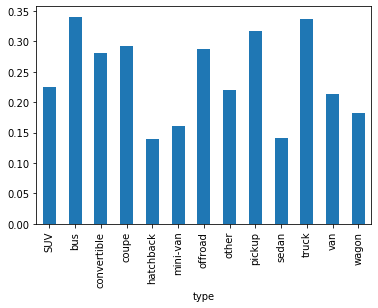

In [24]:
y=clean_data.groupby('type')['price'].mean()/len(clean_data)
y.plot(x='type',kind='bar')
plt.show()


## Price factors

From the car_age scatter plot we can understand that as the age of the car is going up the price of the car is going down, but seem that the price pick up slightly after 40 years, maybe due to the car rarity. Same thing with the mileage - as the mileage going up the price goes down. From the boxplot we can see that Yellow and Orange cars are more expensive then other colors, and also cars with 'other' transmission type are more expensive. 

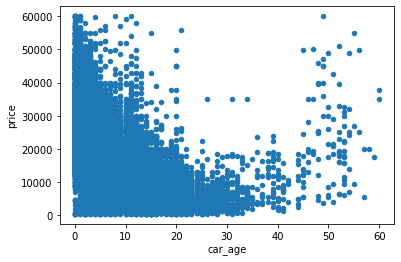

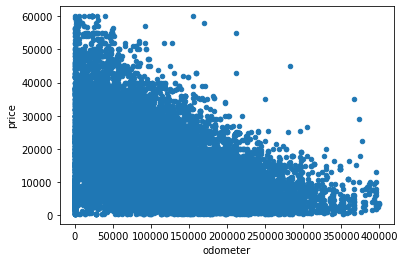

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


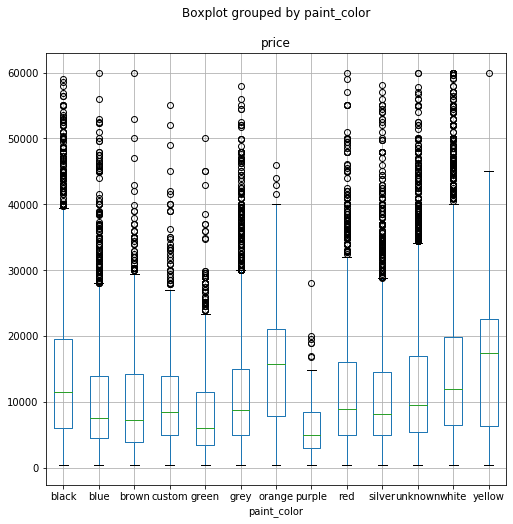

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


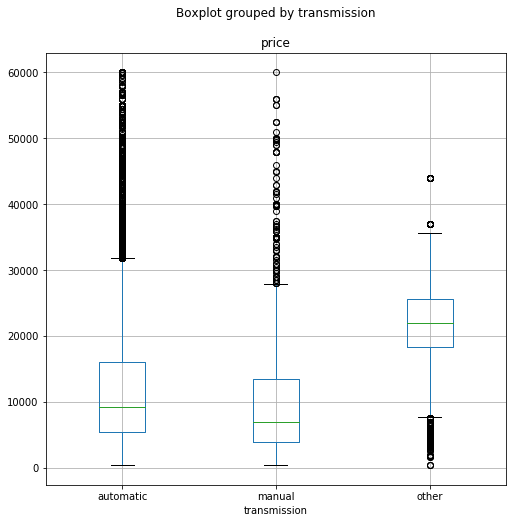

In [25]:
clean_data.plot.scatter(x='car_age', y='price')
plt.show()
clean_data.plot.scatter(x='odometer', y='price')
plt.show()
clean_data.boxplot(column='price', by='paint_color',figsize=(8, 8))
plt.show()
clean_data.boxplot(column='price', by='transmission',figsize=(8, 8))
plt.show()


## General conclusion

In conclusion:

I have replaced the missing values in the bool column is_4wd by filling it with already filled in models that is already 1 in our data, the rest were filled with 0.

I have replaced the missing values in the column color by 'unknown' as it is not possible to recover car color. 'unknown' will not skew our data.

I have replaced the missing values in the column cylinders by taking the median cylinders for each model and year and assigned it to missing and wrong values.

I have replaced the missing values in the column odometer by by creating new car_age column, calculating the median mileage per year and filling nans by multiplying the car age with that median.

Data types were replaces in the following columns:
date_posted & model_year for datetime.
model_year,car_age,cylinders,odometer to int64.
is_4wd to bool.

We observed that there were outliers in price both in high values and low values. The high values were compered to median prices of the same model same year car, and outliers were dropped. Low prices cars that were below the samllest median were dropped.

In order to compare how parameters effect the car price, 2 - dimentional scatter plots were examined and a clear correlation was found in car_age and odometer column. Also clear paramaters were found in car color and transmission types.

My analysis shows that the price of the car is depended on car age - where car is pricier when the age is lower, however, there is a slight uptick in prices for cars above 40 years of age. On odometer values - were a car is pricier where the odometer values are lower. Also yellow and orange cars are more expensive then other colors, and also cars with 'other' transmission type are more expensive. 




